<a href="https://colab.research.google.com/github/fboldt/aulas-am-bsi/blob/main/aula03a_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## O que é Regressão?
- Problema de regressão: prever uma variável contínua a partir de uma ou mais variáveis explicativas.  
- Exemplo: prever o preço mediano de casas a partir de renda média, idade das casas, número médio de cômodos etc.
- Saída típica: $\hat{y} \in \mathbb{R}$ (não rótulos categóricos).  

## California Housing Dataset
- Dataset: California Housing, com 20.640 amostras e 8 atributos explicativos.   
- Atributos principais: MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude.
- Alvo: valor mediano das casas em unidades de 100.000 dólares.


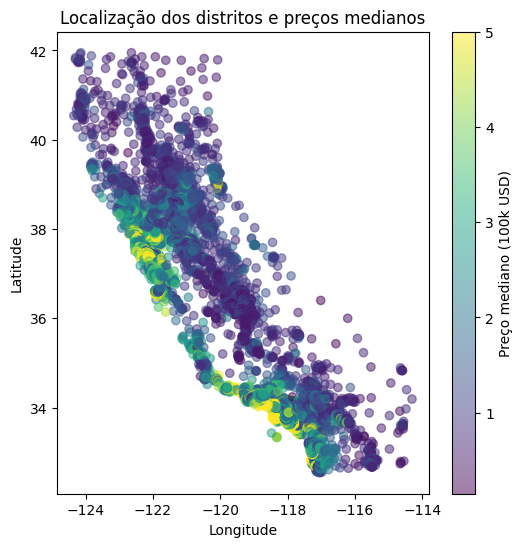

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

housing = fetch_california_housing()
X = housing.data
y = housing.target
feature_names = housing.feature_names

plt.figure(figsize=(6, 6))
plt.scatter(X[:, feature_names.index("Longitude")],
            X[:, feature_names.index("Latitude")],
            c=y, cmap="viridis", alpha=0.5)
plt.colorbar(label="Preço mediano (100k USD)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Localização dos distritos e preços medianos")
plt.show()

In [6]:
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [10]:
X_medinc = X[:, feature_names.index("MedInc")].reshape(-1,1)
X_medinc.shape

(20640, 1)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_medinc, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16512, 1) (16512,)
(4128, 1) (4128,)


In [24]:
def average_predictor(y):
  y_pred = np.ones_like(y) * np.mean(y)
  return y_pred

y_pred_average = average_predictor(y_train)
y_pred_average.shape

(16512,)

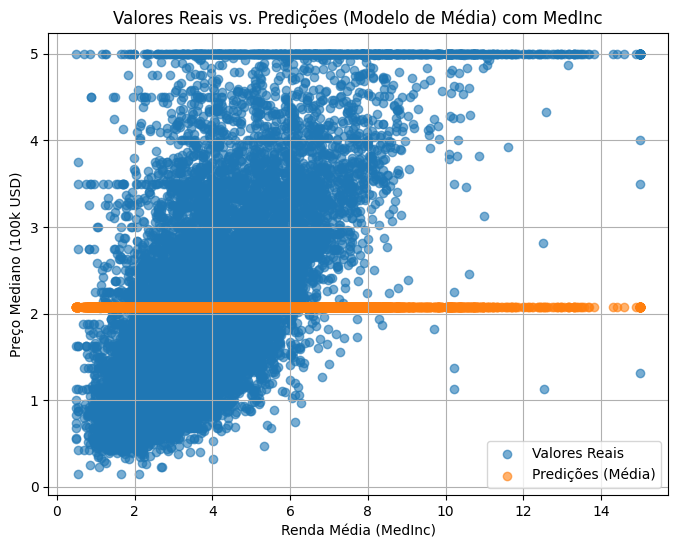

In [49]:
def plot_predictions(X_train, y_train, y_pred_average):
  plt.figure(figsize=(8, 6))
  plt.scatter(X_train, y_train, label="Valores Reais", alpha=0.6)
  plt.scatter(X_train, y_pred_average, label="Predições (Média)", alpha=0.6)
  plt.xlabel("Renda Média (MedInc)")
  plt.ylabel("Preço Mediano (100k USD)")
  plt.title("Valores Reais vs. Predições (Modelo de Média) com MedInc")
  plt.legend()
  plt.grid(True)
  plt.show()

plot_predictions(X_train, y_train, y_pred_average)

In [36]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_train, y_pred_average)
print(f"Erro Quadrático Médio (MSE): {mse}")

Erro Quadrático Médio (MSE): 1.336778211789427


In [29]:
print(y_pred_average[0])

2.071946937378876


In [41]:
y_pred_random_val = np.ones_like(y_train) * 2

mse = mean_squared_error(y_train, y_pred_random_val)
print(f"Erro Quadrático Médio (MSE): {mse}")

Erro Quadrático Médio (MSE): 1.341954573587627


In [43]:
from sklearn.base import BaseEstimator, RegressorMixin

class AverageRegressor(BaseEstimator, RegressorMixin):
    def fit(self, X, y):
        self.mean = np.mean(y)
    def predict(self, X):
        y_pred = np.ones(shape=(X.shape[0],)) * self.mean
        return y_pred

average_regressor = AverageRegressor()
average_regressor.fit(X_train, y_train)
y_pred_average = average_regressor.predict(X_train)
mse = mean_squared_error(y_train, y_pred_average)
print(f"Erro Quadrático Médio (MSE): {mse}")

Erro Quadrático Médio (MSE): 1.336778211789427


## Regressão Linear Simples
- Uma variável explicativa $x \in \mathbb{R}$, alvo $y \in \mathbb{R}$.  
- Modelo:  
$$
\hat{y} = \beta_0 + \beta_1 x
$$  
- $\beta_0$: intercepto; $\beta_1$: inclinação.  

Erro Quadrático Médio (MSE): 0.7230769079727714


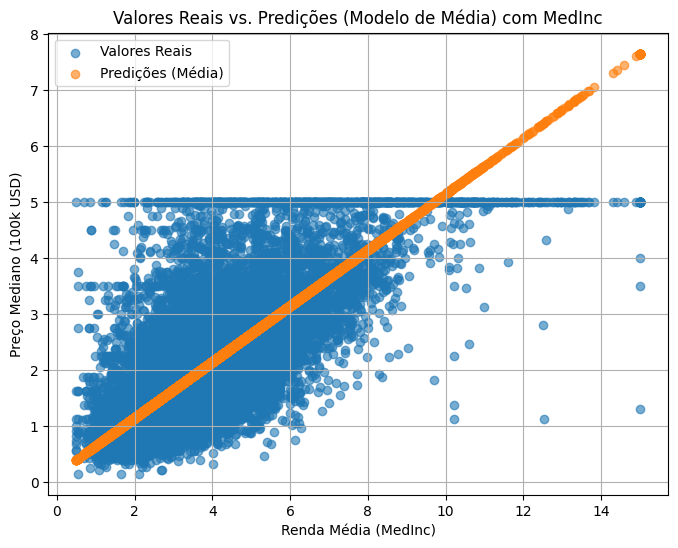

In [67]:
class LinearRegressor(BaseEstimator, RegressorMixin):
    def fit(self, X, y):
        self.intercept_ = 0.15
        self.coef_ = 0.5
        self
    def predict(self, X):
        y_pred = X * self.coef_ + self.intercept_
        return y_pred

lr = LinearRegressor()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_train)
mse = mean_squared_error(y_train, y_pred_lr)
print(f"Erro Quadrático Médio (MSE): {mse}")
plot_predictions(X_train, y_train, y_pred_lr)

## Regressão Linear Múltipla (Escalar)
- Para $p$ features:  
$$
\hat{y}^{(i)} = \beta_0 + \beta_1 x_1^{(i)} + \dots + \beta_p x_p^{(i)}
$$  
- Vetor de parâmetros $\beta = (\beta_0, \dots, \beta_p)$.  

Erro Quadrático Médio (MSE): 8874.137737327135


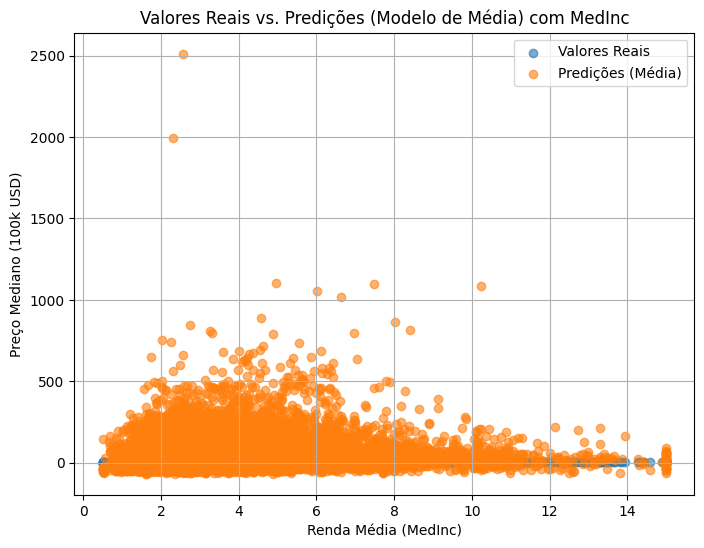

In [89]:
class LinearRegressor(BaseEstimator, RegressorMixin):
    def fit(self, X, y):
        self.intercept_ = np.random.rand()
        self.coefs_ = np.random.rand(X.shape[1])
        self
    def predict(self, X):
        y_pred = X @ self.coefs_ + self.intercept_
        return y_pred

lr = LinearRegressor()
lr.fit(X, y)
y_pred_lr = lr.predict(X)
mse = mean_squared_error(y, y_pred_lr)
print(f"Erro Quadrático Médio (MSE): {mse}")
plot_predictions(X[:,0:1], y, y_pred_lr)

Erro Quadrático Médio (MSE): 5.0044999904405865


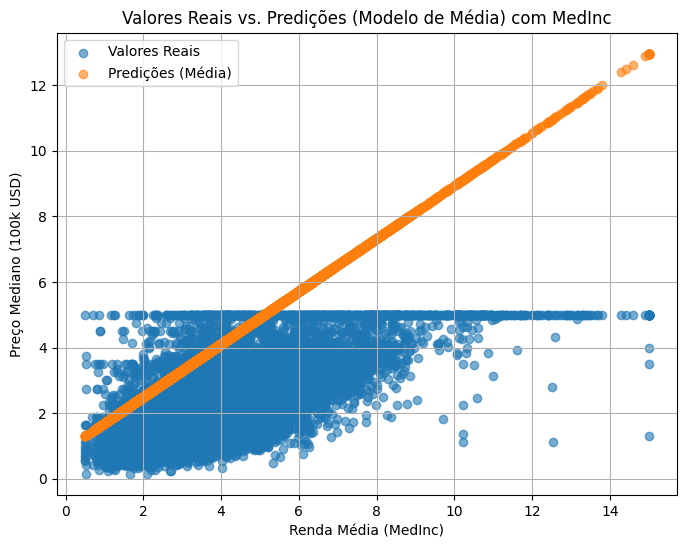

In [90]:
class LinearRegressor(BaseEstimator, RegressorMixin):
    def fit(self, X, y):
        self.intercept_ = np.random.rand()
        self.coefs_ = np.random.rand(X.shape[1])
        self
    def predict(self, X):
        y_pred = X @ self.coefs_ + self.intercept_
        return y_pred

lr = LinearRegressor()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_train)
mse = mean_squared_error(y_train, y_pred_lr)
print(f"Erro Quadrático Médio (MSE): {mse}")
plot_predictions(X_train, y_train, y_pred_lr)

In [98]:
print(lr.intercept_, lr.coefs_)

0.15 [0.5]


In [97]:
lr.intercept_ = 0.15
lr.coefs_[0] = 0.5

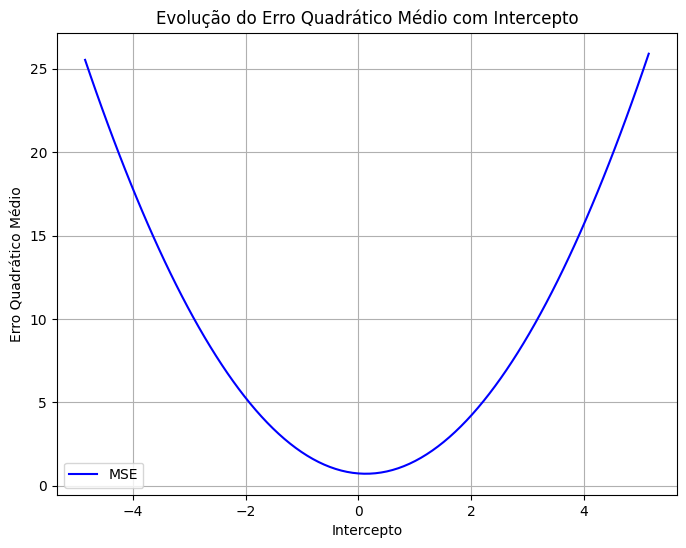

In [99]:
def plot_mse_by_intercept(model, X, y):
  intercept = model.intercept_
  i_min = intercept - 5
  i_max = intercept + 5
  mse_list = []
  for i in np.linspace(i_min, i_max, 100):
    model.intercept_ = i
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    mse_list.append(mse)
  plt.figure(figsize=(8, 6))
  plt.plot(np.linspace(i_min, i_max, 100), mse_list
           , label="MSE", color="blue")
  plt.xlabel("Intercepto")
  plt.ylabel("Erro Quadrático Médio")
  plt.title("Evolução do Erro Quadrático Médio com Intercepto")
  plt.legend()
  plt.grid(True)
  plt.show()

plot_mse_by_intercept(lr, X_train, y_train)

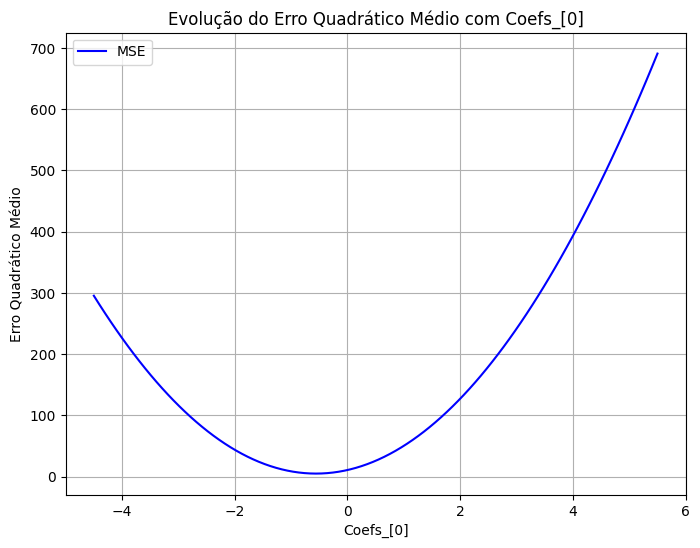

In [100]:
def plot_mse_by_coef0(model, X, y):
  coef0 = model.coefs_[0]
  i_min = coef0 - 5
  i_max = coef0 + 5
  mse_list = []
  for i in np.linspace(i_min, i_max, 100):
    model.coefs_[0] = i
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    mse_list.append(mse)
  plt.figure(figsize=(8, 6))
  plt.plot(np.linspace(i_min, i_max, 100), mse_list
           , label="MSE", color="blue")
  plt.xlabel("Coefs_[0]")
  plt.ylabel("Erro Quadrático Médio")
  plt.title("Evolução do Erro Quadrático Médio com Coefs_[0]")
  plt.legend()
  plt.grid(True)
  plt.show()

plot_mse_by_coef0(lr, X_train, y_train)

In [106]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Erro Quadrático Médio (MSE): 0.6991447170182823


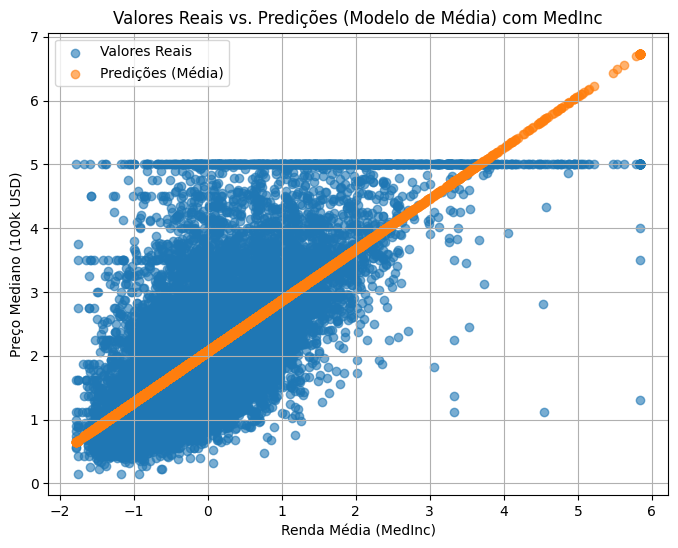

In [108]:
class LinearRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, learning_rate=0.0001, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
    def fit(self, X, y):
        self.intercept_ = np.random.rand()
        self.coefs_ = np.random.rand(X.shape[1])
        for _ in range(self.num_iterations):
            y_pred = X @ self.coefs_ + self.intercept_
            error = y - y_pred
            self.coefs_ += self.learning_rate * X.T @ error
            self.intercept_ += self.learning_rate * np.sum(error)
        self
    def predict(self, X):
        y_pred = X @ self.coefs_ + self.intercept_
        return y_pred


lr = LinearRegressor()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred_lr)
print(f"Erro Quadrático Médio (MSE): {mse}")
plot_predictions(X_train_scaled, y_train, y_pred_lr)